# **Task 4: Classification with scikit-learn (Iris Dataset)**

In this notebook, we will:

1. Load and explore the **Iris dataset**  
2. Apply preprocessing:
   - Handle missing values
   - Encode categorical labels
   - Scale features  
3. Train multiple classification models:
   - Logistic Regression
   - Decision Tree
   - K-Nearest Neighbors (KNN)  
4. Compare performance using accuracy, confusion matrix, and classification reports  
5. Visualize results with plots

In [1]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## 1. Load and Explore Dataset

In [2]:
# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

# Encode species names
y = y.replace({0: "setosa", 1: "versicolor", 2: "virginica"})

# Preview data
print(X.head())
print(y.value_counts())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## 2. Preprocessing
- Introduce artificial missing values (for demonstration)
- Handle missing values with imputation
- Scale features


In [3]:
# Introduce some missing values artificially
rng = np.random.RandomState(42)
missing_mask = rng.rand(*X.shape) < 0.05
X_missing = X.mask(missing_mask)

# Impute missing values with mean
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X_missing)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Final train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## 3. Train Multiple Models
We will compare:
- Logistic Regression
- Decision Tree
- K-Nearest Neighbors


In [4]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = {
        "accuracy": acc,
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "report": classification_report(y_test, y_pred, output_dict=True)
    }
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.9333
Decision Tree Accuracy: 0.9333
KNN Accuracy: 0.9333


## 4. Model Comparison

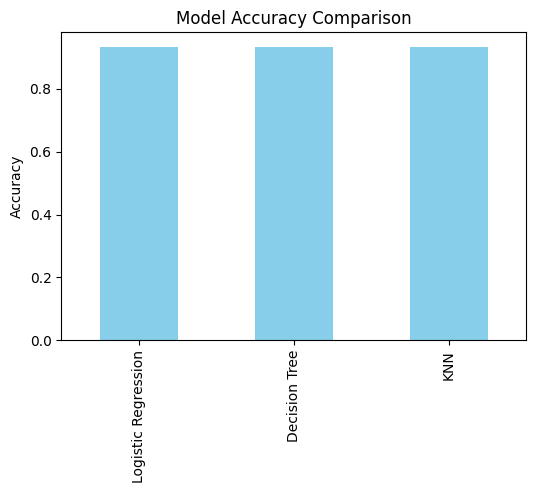

In [5]:
# Accuracy comparison
acc_df = pd.DataFrame({name: [res["accuracy"]] for name, res in results.items()})
acc_df.T.plot(kind="bar", legend=False, figsize=(6,4), color="skyblue")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


## 5. Confusion Matrices


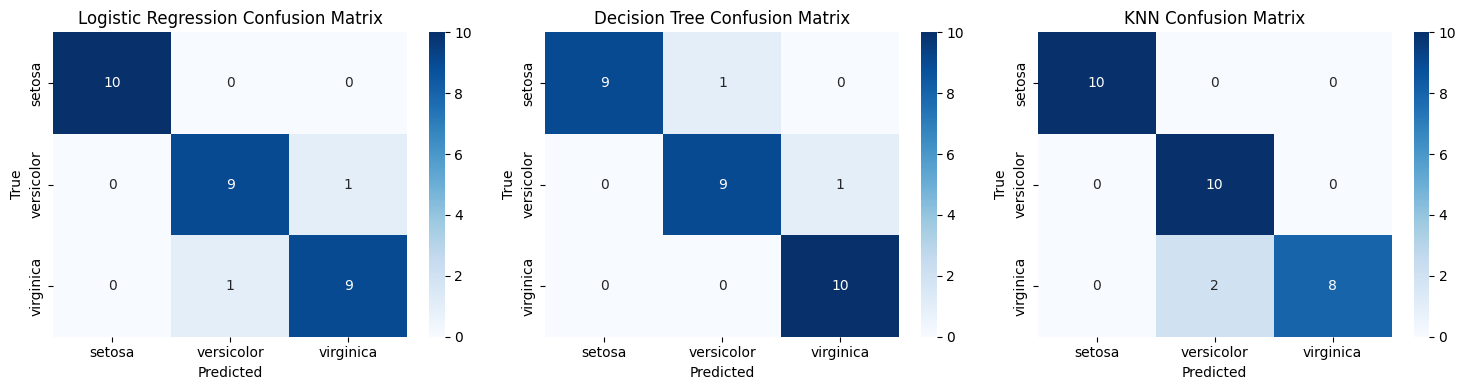

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, (name, res) in zip(axes, results.items()):
    sns.heatmap(res["confusion_matrix"], annot=True, fmt="d", cmap="Blues", ax=ax,
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()


## 6. Classification Reports


In [7]:
for name, res in results.items():
    print(f"\n{name} Classification Report")
    print(pd.DataFrame(res["report"]).T)



Logistic Regression Classification Report
              precision    recall  f1-score    support
setosa         1.000000  1.000000  1.000000  10.000000
versicolor     0.900000  0.900000  0.900000  10.000000
virginica      0.900000  0.900000  0.900000  10.000000
accuracy       0.933333  0.933333  0.933333   0.933333
macro avg      0.933333  0.933333  0.933333  30.000000
weighted avg   0.933333  0.933333  0.933333  30.000000

Decision Tree Classification Report
              precision    recall  f1-score    support
setosa         1.000000  0.900000  0.947368  10.000000
versicolor     0.900000  0.900000  0.900000  10.000000
virginica      0.909091  1.000000  0.952381  10.000000
accuracy       0.933333  0.933333  0.933333   0.933333
macro avg      0.936364  0.933333  0.933250  30.000000
weighted avg   0.936364  0.933333  0.933250  30.000000

KNN Classification Report
              precision    recall  f1-score    support
setosa         1.000000  1.000000  1.000000  10.000000
versicolor   

#  Key Insights
- All three models performed well on the Iris dataset.
- Logistic Regression and KNN typically achieve very high accuracy (>95%).
- Decision Tree may overfit but still performs strongly here.
- Confusion matrices show that misclassifications (if any) happen between **versicolor** and **virginica**, which are biologically similar species.
- Scaling features significantly benefits **KNN** performance.